# Inspecting Individual Events During Data Collection

In [1]:
import skutils
import matplotlib.pyplot as plt
import numpy as np

Skutils is in beta, please contact support@skutek.com with bugs, issues, and questions


## Connecting to your FemtoDAQ

In [ ]:
# Connect to your FemtoDAQ
url = "vireo-000019.tek"  # skutils.FEMTODAQ_USB # for digitizers connected via USB, other replace with URL or IP
digitizer = skutils.FemtoDAQController(url, skip_version_check=True)

digitizer.stop()

print(digitizer.summary())

Vireo-000019 (http://vireo-000019.tek)
Product Revision    : VIREO100_REV_B
Number of Channels  : 2
Sampling Frequency  : 100.0 MHz
ADC Bitdepth        : 14 bits
Maximum Wave Length : 81.92us
Firmware Version    : 5.5.0-0
Software Version    : 5.4.0
Linux Image Version : 5.1.1


## Set Capture Configuration

In [ ]:
# Reset settings to known values
# digitizer.loadDefaultConfig()
digitizer.setTriggerXPosition(8)
digitizer.setTriggerActiveWindow(64)
digitizer.setPulseHeightWindow(8)
digitizer.setPulseHeightAveragingWindow(4)
# set trigger and pulse height windows
for chan in digitizer.channels:
    digitizer.setInvertADCSignal(chan, True)
    digitizer.setEnableTrigger(chan, True)
    digitizer.setDigitalOffset(chan, 700)
    digitizer.setTriggerSensitivity(chan, 50)
    digitizer.setTriggerEdge(chan, "rising")


# Save 512 samples per waveform
digitizer.configureRecording(
    digitizer.channels,
    128,
    "inspection_example",
    waveform_display_enabled=True,
    display_channels=[0, 1],
)
# require both channels to fire
digitizer.configureCoincidence("multiplicity", 2)

## Grab an event for inspection

grabbing event to inspect


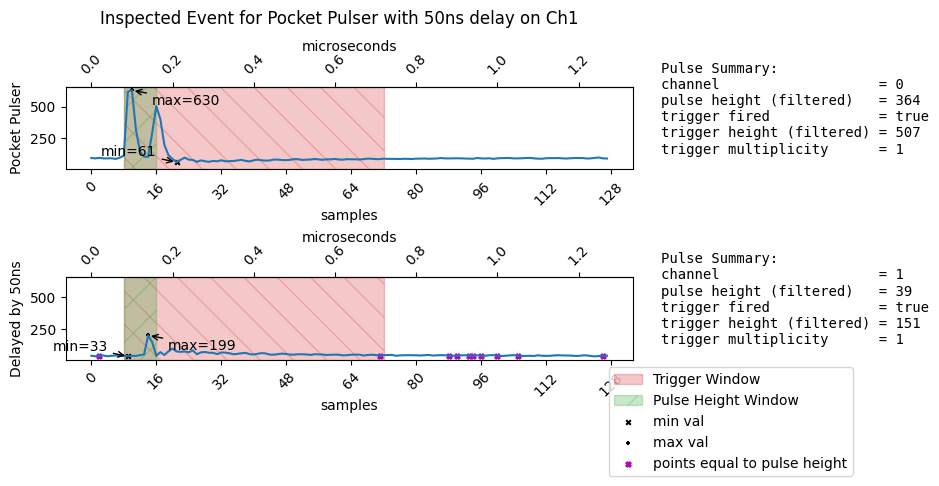

In [16]:
###############################################################################
digitizer.start("continuous")

print("grabbing event to inspect")
inspection_event = digitizer.inspectNextEvent(2)
skutils.quickPlotEvent(
    digitizer,
    inspection_event,
    fig_title="Inspected Event for Pocket Pulser with 50ns delay on Ch1",
    channel_titles={0: "Pocket Pulser", 1: "Delayed by 50ns"},
)
digitizer.stop()